## ECE 131A Data science exploration 2: Please complete this jupyter notebook by filling out the code blocks. Once you have completed the notebook, generate a PDF of the completed notebook and upload the PDF to Gradescope by 11:59 PM on 10/27/2022.

## In this data science exploration, we will be performing basic statistical analysis on two real world datasets. The analysis will consist of plotting the empirical distribution of the quantities of interest in the dataset and visualizing how well the empirical distribution matches with some discrete probability distributions learned in the class. In the first part of the assignment, we will be analyzing an alpha particle emissions dataset. In the second part of the assignment, we will be analyzing a traffic violation dataset.

In [1]:
## Importing the necessary packages
import pandas as pd 
import numpy as np 
import seaborn as sns 
from scipy import stats 
import matplotlib.pyplot as plt

## Alpha emissions dataset: the data consists of measurements of alpha particle emissions from a sample of americium-241. The csv file contains a table with the frequency distribution of the number of alpha particle emissions in 1207 ten second intervals.

In [3]:
## Loading the dataset as a pandas dataframe and printing the header
df_alpha = pd.read_csv('alpha_particle_emissions.csv')
df_alpha.head()

,Number,Frequency
0,0,1
1,1,4
2,2,13
3,3,28
4,4,56


In [6]:
df_alpha

,Number,Frequency
0,0,1
1,1,4
2,2,13
3,3,28
4,4,56
5,5,105
6,6,126
7,7,146
8,8,164
9,9,161


## Plot a normalized histogram of alpha particle emissions: number of alpha particle emissions in the horizontal axis and the normalized frequency in the vertical axis. Also, plot the probability mass function of a poisson random variable fitting the histogram on the same graph.

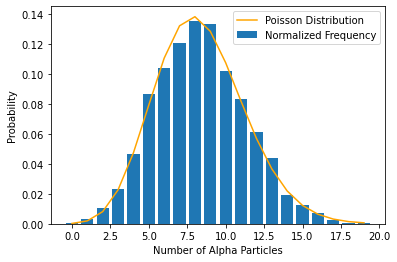

In [19]:
## Helpful functions: plt.hist(), stats.poisson.pmf()

# Start your code here

Frequency=df_alpha.Frequency.to_numpy()[:-1].astype(int)
Number=df_alpha.Number.to_numpy()[:-1].astype(int)
plt.bar(Number,Frequency/np.sum(Frequency),label='Normalized Frequency')
mean=np.sum(Number*Frequency)/np.sum(Frequency)

plt.plot(Number,stats.poisson.pmf(Number,mean),color="orange",label='Poisson Distribution')
plt.legend()
plt.xlabel('Number of Alpha Particles')
plt.ylabel('Probability')
plt.show()
# End your code here


## Traffic violation dataset: data on traffic and pedestrian stops by police in rhode island from January 1 2005 to December 30 2015. The data has many attributes but in this assignment we will only focus on some of the attributes

In [20]:
## Loading the dataset as a pandas dataframe and printing the header
df_police = pd.read_csv('police_project.csv')
df_police.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


## Process the dataframe and create a new dataframe with the following structure:

## - Rows correspond to the stop date

## - Column 1 correspond to the total number of speeding violations on that stop date

## - Column 2 correspond to the total number of drug related stops on that stop date

## - Column 3 correspond to the total number of stops by police on that stop date

## After you have created the dataframe, print the header of the dataframe.

In [35]:
## Helpful functions: df.reset_index().groupby().agg()

# Start your code here
df_police_mod=df_police.copy()
df_police_mod["counts"]=np.ones(len(df_police_mod))
df_police_mod["speeding"]=(df_police_mod["violation"]=="Speeding").astype(int)
df_police_mod["drugs"]=(df_police_mod["drugs_related_stop"]).astype(int)
df_police_mod=df_police_mod[["stop_date","counts","speeding","drugs"]]
df_police_mod=df_police_mod.groupby("stop_date").agg([sum])

# End your code here

## Plot a normalized histogram of the total number of stops by police in a day: total number of stops by police in the horizontal axis and the normalized frequency in the vertical axis. Also, plot the probability mass function of a poisson random variable fitting the normalized histogram on the same graph.

c:\Users\Lawrence\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


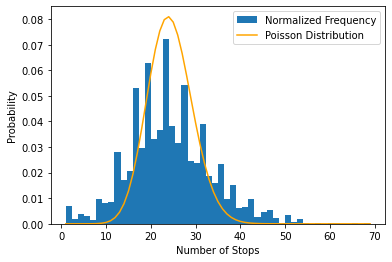

In [48]:
## Helpful functions: plt.hist(), stats.poisson.pmf()

# Start your code here

plt.hist(df_police_mod["counts"],bins=50,density=True,label="Normalized Frequency")
min_counts=np.min(df_police_mod["counts"].astype(int).to_numpy())
max_counts=np.max(df_police_mod["counts"].astype(int).to_numpy())
plt.plot(np.arange(min_counts,max_counts+1),stats.poisson.pmf(np.arange(min_counts,max_counts+1),np.mean(df_police_mod["counts"])),
color="orange",label="Poisson Distribution")

plt.legend()
plt.xlabel('Number of Stops')
plt.ylabel('Probability')
plt.show()
# End your code here



## Plot a normalized histogram of the total number of speeding violations in a day: total number of speeding violations in the horizontal axis and the normalized frequency in the vertical axis. Also, plot the probability mass function of a poisson random variable fitting the normalized histogram on the same graph.

c:\Users\Lawrence\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


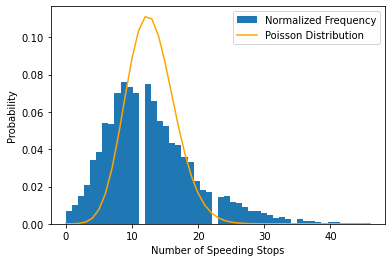

In [52]:
## Helpful functions: plt.hist(), stats.poisson.pmf()

# Start your code here

plt.hist(df_police_mod["speeding"],bins=50,density=True,label="Normalized Frequency")
min_counts=np.min(df_police_mod["speeding"].astype(int).to_numpy())
max_counts=np.max(df_police_mod["speeding"].astype(int).to_numpy())
plt.plot(np.arange(min_counts,max_counts+1),stats.poisson.pmf(np.arange(min_counts,max_counts+1),np.mean(df_police_mod["speeding"])),
color="orange",label="Poisson Distribution")

plt.legend()
plt.xlabel('Number of Speeding Stops')
plt.ylabel('Probability')
plt.show()
# End your code here



## Plot the un-normalized histogram of the total number of drug related stops in a day: total number of drug related stops in the horizontal axis and the frequency in the vertical axis. Which discrete random variable can fit the empirical distribution well?

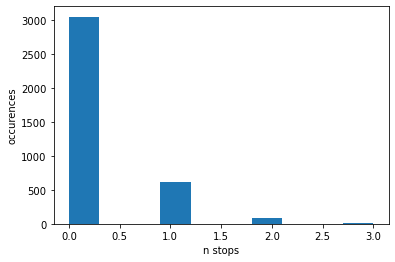

In [59]:
## Helpful functions: plt.hist()

# Start your code here

plt.hist(df_police_mod["drugs"])
plt.xlabel("n stops")
plt.ylabel("occurences")
plt.show()
# End your code here



A Geometric distribution would fit this well